In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

import pickle

In [3]:
data = pd.read_csv('archive/treino.csv')

In [3]:
test = pd.read_csv('archive/teste.csv')

In [4]:
data.head()

inadimplente  util_linhas_inseguras  idade  vezes_passou_de_30_59_dias  \
0             1               0.766127     45                           2   
1             0               0.957151     40                           0   
2             0               0.658180     38                           1   
3             0               0.233810     30                           0   
4             0               0.907239     49                           1   

   razao_debito  salario_mensal  numero_linhas_crdto_aberto  \
0      0.802982          9120.0                          13   
1      0.121876          2600.0                           4   
2      0.085113          3042.0                           2   
3      0.036050          3300.0                           5   
4      0.024926         63588.0                           7   

   numero_vezes_passou_90_dias  numero_emprestimos_imobiliarios  \
0                            0                                6   
1                            0                                0   
2                            1                                0   
3                            0                                0   
4                            0                                1   

   numero_de_vezes_que_passou_60_89_dias  numero_de_dependentes  
0                                      0                    2.0  
1                                      0                    1.0  
2                                      0                    0.0  
3                                      0                    0.0  
4                                      0                    0.0

In [5]:
data.isna().sum()

inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21763
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2878
dtype: int64

In [4]:
data = data.dropna(axis=0)

## Retirando outliers da analise

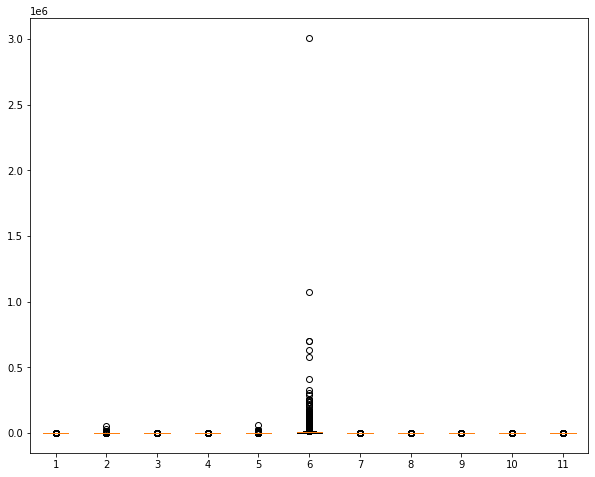

In [7]:
plt.figure(figsize=(10, 8))
plt.boxplot(data)
plt.show()

In [8]:
data.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

### Analisando outliers na coluna util_linhas_inseguras

In [9]:
data[data['util_linhas_inseguras'] <= 1].count()

inadimplente                             86183
util_linhas_inseguras                    86183
idade                                    86183
vezes_passou_de_30_59_dias               86183
razao_debito                             86183
salario_mensal                           86183
numero_linhas_crdto_aberto               86183
numero_vezes_passou_90_dias              86183
numero_emprestimos_imobiliarios          86183
numero_de_vezes_que_passou_60_89_dias    86183
numero_de_dependentes                    86183
dtype: int64

In [10]:
data['util_linhas_inseguras'].mean()

5.855375649590165

In [11]:
data.shape

(88237, 11)

### Analisando outliers na coluna razao_debito

In [12]:
data['razao_debito'].median()

0.296660118

In [13]:
data[data['razao_debito'] <= 1].count()

inadimplente                             82893
util_linhas_inseguras                    82893
idade                                    82893
vezes_passou_de_30_59_dias               82893
razao_debito                             82893
salario_mensal                           82893
numero_linhas_crdto_aberto               82893
numero_vezes_passou_90_dias              82893
numero_emprestimos_imobiliarios          82893
numero_de_vezes_que_passou_60_89_dias    82893
numero_de_dependentes                    82893
dtype: int64

### Retirando os outliers dos dados

In [14]:
data = data[(data['salario_mensal'] <= 15000) & (data['util_linhas_inseguras'] <= 1) & (data['razao_debito'] <= 1)]

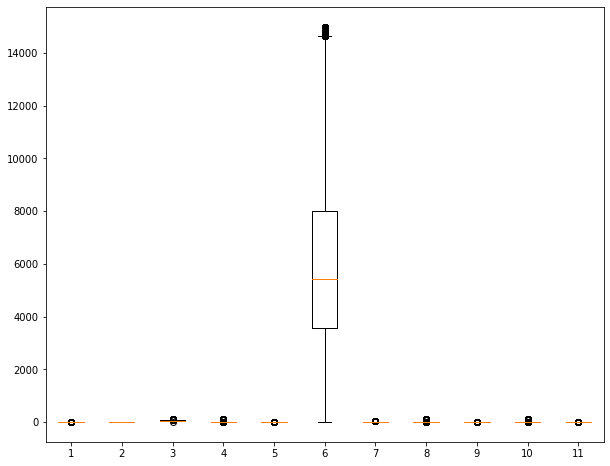

In [15]:
plt.figure(figsize=(10, 8))
plt.boxplot(data)
plt.show()

In [16]:
data.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

In [17]:
X = data.drop('inadimplente', axis=1)
y = data.iloc[:, 0:1]

## Fazendo Balanceamento das classes

<AxesSubplot:xlabel='inadimplente', ylabel='Count'>

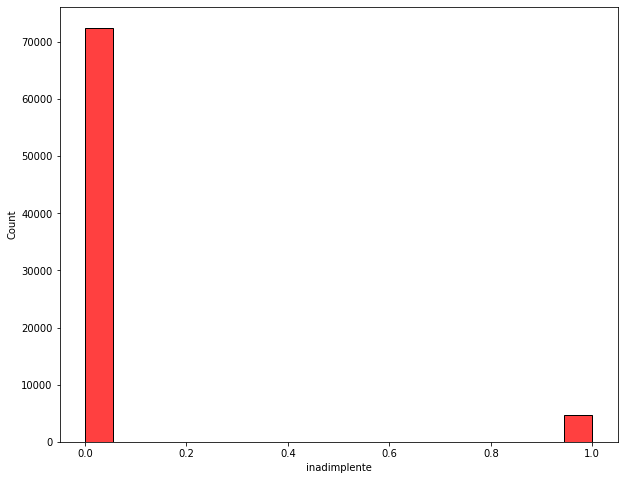

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(x='inadimplente', data=y, color='RED')

In [19]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

<AxesSubplot:xlabel='inadimplente', ylabel='Count'>

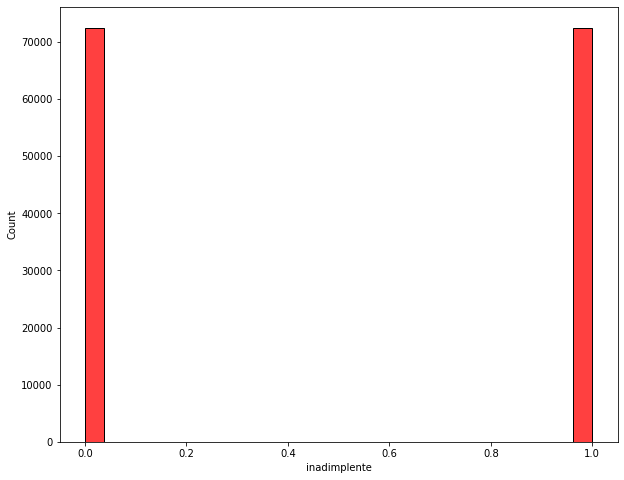

In [20]:
plt.figure(figsize=(10, 8))
sns.histplot(x='inadimplente', data=y_resampled, color='RED')


## Reparticionando o tamanho dos dados

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

## Random Forest

In [46]:
clf = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-46-1bcb9419c01d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier().fit(X_train, y_train)


In [102]:
clf.score(X_test, y_test)

0.9188532958088459

In [25]:
y_pred = clf.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9149904809204537

# Cross validation

In [28]:
all_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

/home/maksonvinicio/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/maksonvinicio/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/maksonvinicio/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/maksonvinicio/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

In [29]:
print(all_scores.mean())

0.9397598148402633


In [30]:
features_importance = zip(clf.feature_importances_, X_resampled)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

util_linhas_inseguras: 25.616992%
numero_de_dependentes: 24.817714%
salario_mensal: 11.247616%
razao_debito: 10.751897%
idade: 8.861212%
numero_linhas_crdto_aberto: 5.877341%
numero_vezes_passou_90_dias: 4.150272%
vezes_passou_de_30_59_dias: 3.998328%
numero_emprestimos_imobiliarios: 3.478462%
numero_de_vezes_que_passou_60_89_dias: 1.200166%


In [ ]:
dsdsd

# Avaliando o modelo

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     18101
           1       0.92      0.91      0.92     18142

    accuracy                           0.92     36243
   macro avg       0.92      0.92      0.92     36243
weighted avg       0.92      0.92      0.92     36243



<AxesSubplot:>

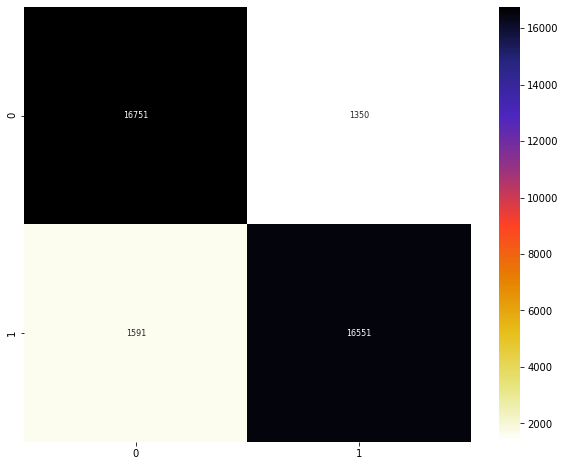

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='CMRmap_r', fmt='.0f', annot_kws={'size': 8})

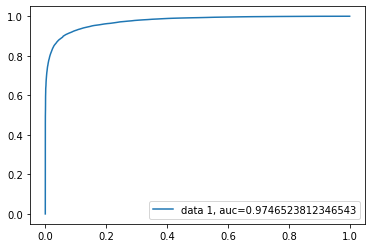

In [82]:
y_probas = clf.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_probas)
auc = roc_auc_score(y_test, y_probas)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [94]:
def plot_pre_curve(y_test, probs):
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("precision recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

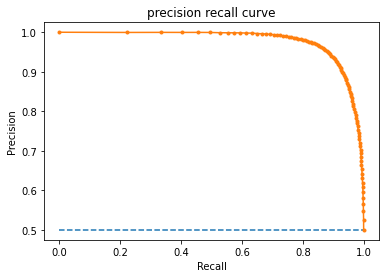

In [95]:
plot_pre_curve(y_test, y_probas)

In [ ]:
dsds

In [104]:
pickle_out = open("clf.pkl", mode = "wb") 
pickle.dump(clf, pickle_out) 
pickle_out.close()